In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from sklearn.decomposition import PCA

Dataset saved as dataset_20250409_052906.csv


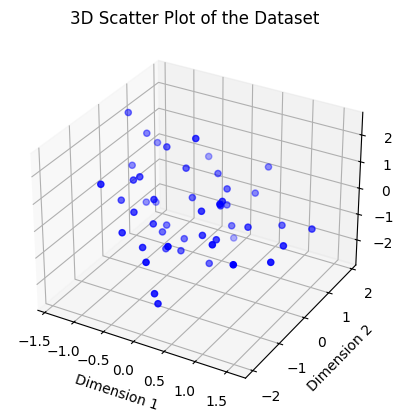

In [3]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate a dataset with 3 dimensions and 50 samples
data = np.random.randn(50, 3)  # 50 rows, 3 columns of random numbers from normal distribution

# Create a DataFrame for easier readability
df = pd.DataFrame(data, columns=['Dimension_1', 'Dimension_2', 'Dimension_3'])

# Create filename with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"dataset_{timestamp}.csv"

# Save the dataset to a CSV file
df.to_csv(filename, index=False)

# Inform the user about the file save
print(f"Dataset saved as {filename}")

# Plotting the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the 3D data
ax.scatter(df['Dimension_1'], df['Dimension_2'], df['Dimension_3'], c='b', marker='o')

# Labeling the axes
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Set the title
ax.set_title('3D Scatter Plot of the Dataset')

# Show the plot
plt.show()

In [4]:
# Step 1: Custom PCA Implementation
def custom_pca(X, n_components):
    # Step 1: Standardize the data
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_meaned.T)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx]

    # Step 5: Select the top 'n_components' eigenvectors (principal components)
    eigenvectors_selected = eigenvectors_sorted[:, :n_components]

    # Project the data onto the new basis (principal components)
    X_pca = X_meaned.dot(eigenvectors_selected)

    # Return the transformed data and explained variance
    explained_variance = eigenvalues_sorted[:n_components] / np.sum(eigenvalues_sorted)

    return X_pca, explained_variance

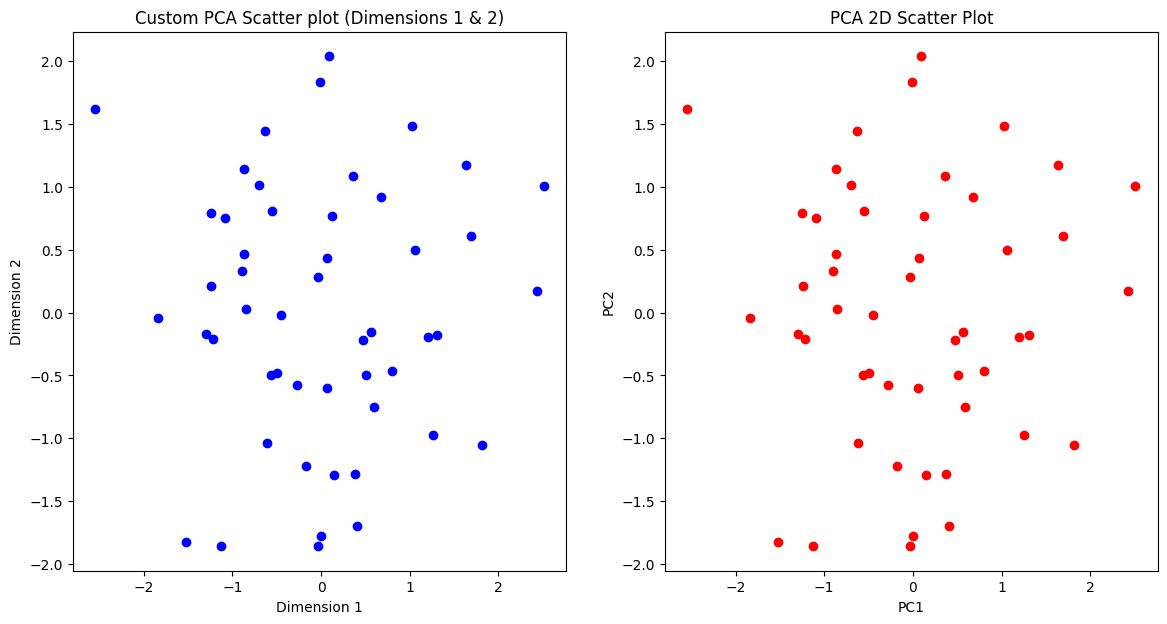

Explained Variance Ratio by each Principal Component: [0.43231008 0.38981332]
Explained Variance Ratio by each Custom Principal Component: [0.43231008 0.38981332]


In [5]:
# Apply Custom PCA
X = df.values
custom_pca_data, custom_explained_variance = custom_pca(X, n_components=2)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(df)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plotting the original and PCA-transformed data in 2D
fig = plt.figure(figsize=(14, 7))

# Subplot 1: Original data (Projected to 2D for visualization)
ax1 = fig.add_subplot(121)
ax1.scatter(custom_pca_data[:, 0], custom_pca_data[:, 1], c='b', marker='o')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_title('Custom PCA Scatter plot (Dimensions 1 & 2)')

# Subplot 2: PCA-transformed data (2D)
ax2 = fig.add_subplot(122)
ax2.scatter(pca_df['PC1'], pca_df['PC2'], c='r', marker='o')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA 2D Scatter Plot')

# Show the plots
plt.show()

# Print the explained variance ratio to understand the contribution of each principal component
print(f"Explained Variance Ratio by each Principal Component: {pca.explained_variance_ratio_}")
print(f"Explained Variance Ratio by each Custom Principal Component: {custom_explained_variance}")